In [18]:
import pandas as pd
import geopandas as gpd

import seaborn as sns
import pylab as plt
import folium

%matplotlib inline

In [100]:
police_stats = pd.read_csv('datasets/Police_Statistics___2005_-_2017.csv')
police_stats['Police Station'] = police_stats['Police Station'].str.lower()
police_stats.Crime = police_stats.Crime.str.replace('17  ','')
# make year into int
police_stats.Year = police_stats.Year.apply(lambda s: int(s.split('-')[0]))
police_stats.head()

,Police Station,Province,Crime,Year,Incidents
0,cape town central,Western Cape,All theft not mentioned elsewhere,2005,6692.0
1,cape town central,Western Cape,All theft not mentioned elsewhere,2006,6341.0
2,cape town central,Western Cape,All theft not mentioned elsewhere,2007,5966.0
3,cape town central,Western Cape,All theft not mentioned elsewhere,2008,5187.0
4,cape town central,Western Cape,All theft not mentioned elsewhere,2009,4985.0


In [10]:
thefts = ['All theft not mentioned elsewhere','Carjacking','Burglary at non-residential premises',
         'Burglary at residential premises','Shoplifting','Common robbery','Robbery at residential premises',
          'Robbery at non-residential premises','Robbery with aggravating circumstances','Bank Robbery',
          'Theft of motor vehicle and motorcycle','Truck hijacking','Theft out of or from motor vehicle',]
assault = ['Assault with the intent to inflict grievous bodily harm','Common assault',]
serous_crime = ['Arson','Attempted murder','Murder',]
sexual_offences = ['Attempted sexual offences','Rape','Contact sexual offences','Sexual Assault',
                  'Sexual Offences detected as a result of Police Action','Sexual Offences',]
blue_collar = ['Commercial crime','Stock-theft',]
drugs = ['Drug-related crime','Driving under the influence of alcohol or drugs',]
illegal_possession = ['Illegal possession of firearms and ammunition',]
property_damage = ['Malicious damage to property',]
police_stats['Crime'].unique()

array(['All theft not mentioned elsewhere', 'Arson',
       'Assault with the intent to inflict grievous bodily harm',
       'Attempted murder', 'Carjacking', 'Attempted sexual offences',
       'Burglary at non-residential premises',
       'Burglary at residential premises', 'Commercial crime', 'Rape',
       'Shoplifting', 'Common assault', 'Common robbery',
       'Contact sexual offences', 'Drug-related crime',
       'Driving under the influence of alcohol or drugs',
       'Illegal possession of firearms and ammunition', 'Murder',
       'Malicious damage to property',
       'Robbery at non-residential premises', 'Stock-theft',
       'Sexual Assault', 'Robbery at residential premises',
       'Robbery with aggravating circumstances',
       'Sexual Offences detected as a result of Police Action',
       'Theft of motor vehicle and motorcycle', 'Truck hijacking',
       'Theft out of or from motor vehicle', 'Sexual Offences',
       'Bank Robbery', 'Contact Crime', 'Contact Re

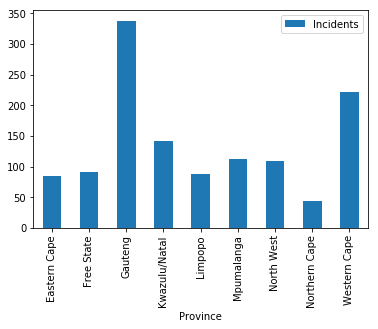

In [3]:
police_stats.groupby('Province').mean().plot(kind='bar')

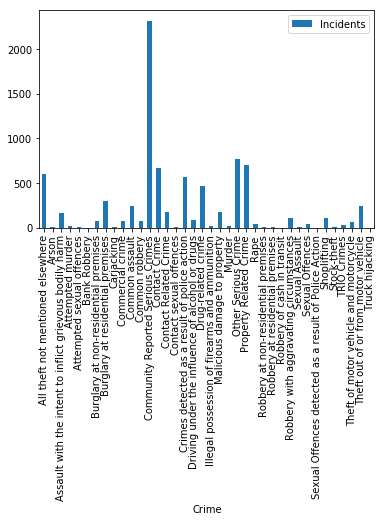

In [4]:
police_stats.groupby(['Province', 'Crime']).mean().loc['Western Cape'].plot(kind='bar')

# Population

In [11]:
population_gdf = gpd.read_file('datasets/population/geo_export_3ec3ac74-ddff-4220-8007-b9b5643f79af.shp')
population_gdf.sal_code_i = population_gdf.sal_code_i.astype(int)
population_gdf.iloc[0].T

unspec_lan                                                    0
a70_79                                                       24
asian                                                         0
cert_dip                                                      0
sign_lang                                                     3
a40_49                                                       18
sal_code_i                                              1600090
tshivenda                                                     0
ntc                                                           3
isi_ndebel                                                    0
other_edu                                                     9
other_race                                                    0
tribal_are                                                    0
black_afri                                                  180
secondary                                                    96
setswana                                

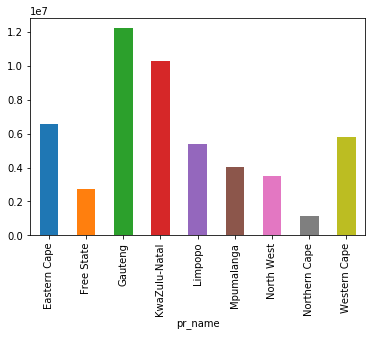

In [110]:
ages = ['a70_79', 'a40_49', 'a30_39', 'a10_19', 'a80_plus', 'a0_9','a60_69','a50_59','a20_29',]
races = ['asian','other_race','black_afri','white',  'coloured']
languages = ['unspec_lan','sign_lang','tshivenda','isi_ndebel','setswana','isi_xhosa', 'na_lang','sepedi',
            'xitsonga','isi_zulu', 'english', 'other_lang','si_swati', 'sesotho', 'afrikaans']
educations = ['cert_dip','other_edu','secondary','primary', 'tertiary', 'no_schooli','ntc']
area = ['urban_area','farm_area','tribal_are']
population_gdf.groupby(['pr_name']).sum()[ages].sum(1).plot(kind='bar')

In [7]:
population_gdf['area'] = population_gdf.geometry.apply(lambda geo: geo.area)
population_gdf.groupby('pr_name').area.sum()

pr_name
Eastern Cape     13.864422
Free State       11.794836
Gauteng           1.565520
KwaZulu-Natal     8.003449
Limpopo           9.612107
Mpumalanga        6.570977
North West        8.788651
Northern Cape    34.112364
Western Cape     12.309818
Name: area, dtype: float64

In [9]:
precint2_sa = pd.read_csv('datasets/Precinct_to_small_area_weights.csv')
precint2_sa.head()

,small_area,precinct,weight
0,4990076,BOTSHABELO,0.003664
1,4990712,BOTSHABELO,0.007023
2,4990568,BOTSHABELO,0.006534
3,4990866,BOTSHABELO,0.007524
4,4990535,BOTSHABELO,0.006028


In [12]:
population_gdf.query('sal_code_i == 4990076')

,unspec_lan,a70_79,asian,cert_dip,sign_lang,a40_49,sal_code_i,tshivenda,ntc,isi_ndebel,...,a0_9,a60_69,sp_name,tertiary,no_schooli,white,a50_59,a20_29,coloured,geometry
27202,0.0,3.0,0.0,0.0,3.0,33.0,4990076,0.0,0.0,3.0,...,72.0,6.0,Botshabelo M,3.0,12.0,0.0,15.0,81.0,0.0,"POLYGON ((26.72108136 -29.27990412, 26.7231938..."


In [68]:
threshold_scale

[1.2413421837e-05, 0.008312719709468501, 0.0166130259971]

In [111]:
a = pd.merge(precint2_sa.query('precinct == "BOTSHABELO"'), 
         population_gdf[['sal_code_i','sp_name', 'pr_name','geometry']+ages], left_on='small_area',right_on='sal_code_i')
a = gpd.GeoDataFrame(a,crs=population_gdf.crs)
a = a[['small_area','precinct','weight','pr_name','geometry']+ages]
a.precinct = a.precinct.str.lower()
#a.weight = a.weight.apply(pd.np.log)
threshold_scale = pd.np.linspace(a['weight'].min(),
                              a['weight'].max(), 6).tolist()
#a = a.to_crs({'init': 'epsg:4326'})
crime_map = folium.Map([-29.787464, 25.300202], zoom_start = 6)
crime_map.choropleth(a.to_json(),a,key_on='feature.properties.small_area',
                     columns=['small_area','weight'],fill_color='YlGn',
                     threshold_scale=threshold_scale)
crime_map

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

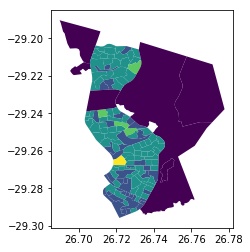

In [91]:
fig,ax =plt.subplots()
a.plot(column='weight',scheme='equal_interval',ax=ax)
plt.colorbar()

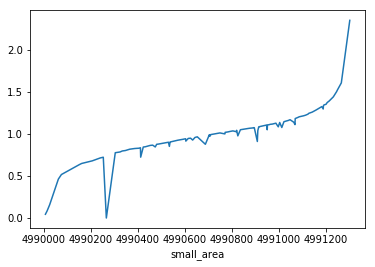

In [114]:
b = pd.merge(a,police_stats.query("Crime == 'Drug-related crime'"), 
         left_on='precinct', right_on='Police Station')
b = gpd.GeoDataFrame(b,crs=population_gdf.crs)
b= b[['small_area','precinct','weight','geometry','Province','Crime','Year','Incidents']]
b['total_crime'] = b.weight * b.Incidents
b.groupby('small_area').mean().total_crime.plot()